## Jordy Salguero - Analysis

* Urban areas have a much higher total number of rides than suburban and rural areas. However, their average fare is much lower. This is something to note which is most likely due to competition.

* On the other hand, rural areas have a much lower total number of rides and a much higher average fare which is most likely due to a lower supply and demand.

* Randallchester has the highest fare of $58.55 and was conducted in a Rural area, while West Samuelburgh has the highest # of drivers which is found in an Urban area. This supports the two conclusions above. 

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# merge_df = city_data.merge(ride_data)
merge_df = pd.merge(city_data,ride_data, on = "city", how = "left")

# Display the data table for preview
organized_df = merge_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]

organized_df.groupby(["type"])
organized_df.head()


#Code used for the analysis
#organized_df.sort_values("fare", ascending = False)
#organized_df.sort_values("driver_count", ascending = False)

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

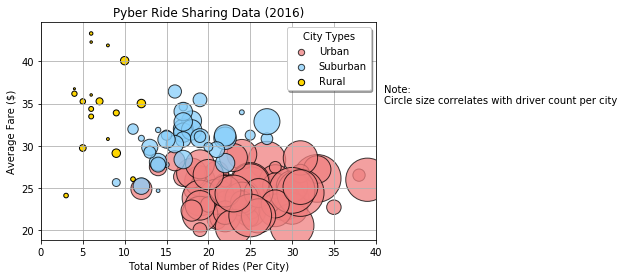

In [2]:
# Obtain the x and y coordinates for each of the three city types

#Urban Data
urban_df = organized_df.loc[organized_df["type"] == "Urban"]
urban_group = urban_df.groupby("city")
urban_mean = urban_group["fare"].mean()
urban_count = urban_group["ride_id"].count()
urban_circle_size = urban_group["driver_count"].sum()
urban_plot = plt.scatter(urban_count,urban_mean, marker = 'o', facecolors = "LightCoral", edgecolors = "black", s = urban_circle_size, alpha = 0.75, label = "Urban")

#Suburban Data
suburban_df = organized_df.loc[organized_df["type"] == "Suburban"]
suburban_group = suburban_df.groupby("city")
suburban_mean = suburban_group["fare"].mean()
suburban_count = suburban_group["ride_id"].count()
suburban_circle_size = suburban_group["driver_count"].sum()
suburban_plot = plt.scatter(suburban_count,suburban_mean, marker = 'o', facecolors = "LightSkyBlue", edgecolors = "black", s = suburban_circle_size, alpha = 0.75, label = "Suburban")


#Rural Data
rural_df = organized_df.loc[organized_df["type"] == "Rural"]
rural_group = rural_df.groupby("city")
rural_mean = rural_group["fare"].mean()
rural_count = rural_group["ride_id"].count()
rural_circle_size = rural_group["driver_count"].sum()
rural_plot = plt.scatter(rural_count,rural_mean, marker = 'o', facecolors = "Gold", edgecolors = "black", s = rural_circle_size, label = "Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.xlim(0, 40)

# Create a legend
legend = plt.legend(loc="best", title = "City Types", fancybox = True, shadow = True)
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
side_note = plt.text(x=41,y=35,s="Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("Images/Pyber Ride Sharing Data(2016).png")

## Total Fares by City Type

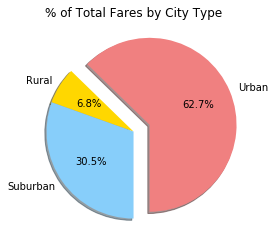

In [3]:
# Calculate Fares by City sums
urban_fares = urban_df["fare"].sum()
suburban_fares = suburban_df["fare"].sum()
rural_fares = rural_df["fare"].sum()
total_fares = organized_df["fare"].sum()

#Percentages
urban_fares_percent = (urban_fares / total_fares) * 100
suburban_fares_percent = (suburban_fares / total_fares) * 100
rural_fares_percent = (rural_fares / total_fares) * 100

# Build Pie Chart
labels = ["Urban","Rural", "Suburban"]
sizes = [urban_fares_percent,rural_fares_percent, suburban_fares_percent]
colors = ["LightCoral", "Gold", "LightSkyBlue"]

explode = [0.2,0,0]

farebytype_plot = plt.pie(sizes,explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = -90)
farebytype_title = plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Total Fares by City Type.png")

## Total Rides by City Type

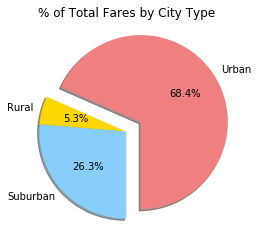

In [4]:
# Calculate Rides by City sums
urban_rides = urban_df["ride_id"].count()
suburban_rides = suburban_df["ride_id"].count()
rural_rides = rural_df["ride_id"].count()
total_rides = organized_df["ride_id"].count()

#Percentages
urban_rides_percent = (urban_rides / total_rides) * 100
suburban_rides_percent = (suburban_rides / total_rides) * 100
rural_rides_percent = (rural_rides / total_rides) * 100

# Build Pie Chart
labels = ["Urban","Rural", "Suburban"]
sizes = [urban_rides_percent,rural_rides_percent, suburban_rides_percent]
colors = ["LightCoral", "Gold", "LightSkyBlue"]

explode = [0.2,0,0]

farebytype_plot = plt.pie(sizes,explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = -90)
farebytype_title = plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Total Rides by City Type.png")

## Total Drivers by City Type

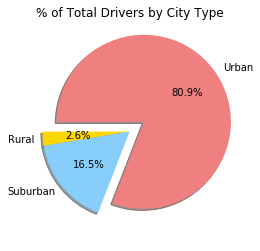

In [5]:
drivers_by_type = city_data.groupby(["type"])
sum_drivers = drivers_by_type["driver_count"].sum()
total_drivers = city_data["driver_count"].sum()

percent = (sum_drivers / total_drivers) * 100

# Build Pie Chart
labels = ["Rural","Suburban", "Urban"]
colors = ["Gold", "LightSkyBlue", "LightCoral"]

explode = [0,0,0.2]

ridebytype_plot = plt.pie(percent,explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 180)
ridebytype_title = plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Total Drivers by City Type.png")


In [6]:
# Show Figure
plt.show()